In [1]:
import torch

from resnet import *

import torchvision
import torchvision.transforms as transforms

import torch.optim as optim

from tqdm import tqdm

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as img

## DataLoad Phase

In [2]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

trainset = torchvision.datasets.ImageNet('/media/data1/data/Imagenet', split='train', transform=transform)
print(type(trainset))
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.ImageNet('/media/data1/data/Imagenet', split='val', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

<class 'torchvision.datasets.imagenet.ImageNet'>


### Data check

<class 'torch.utils.data.dataloader.DataLoader'>


  0%|                                                                                                                                                                                 | 0/20019 [00:00<?, ?it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'numpy.ndarray'>
(64, 3, 224, 224)


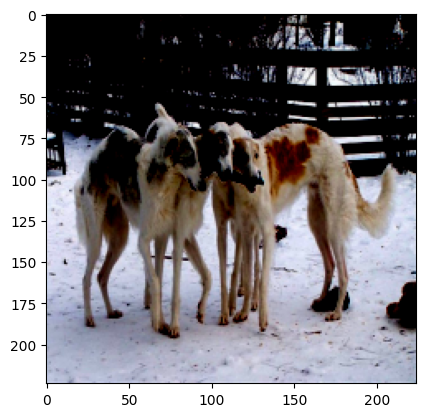

  0%|                                                                                                                                                                                 | 0/20019 [00:00<?, ?it/s]

label =  tensor(169)


In [3]:
print(type(trainloader))
train_bar = tqdm(trainloader)
for data, target in train_bar:
    data = data.detach().numpy()
    print(type(data))
    print(data.shape)
    plt.imshow(data[1].transpose((1,2,0)))
    plt.show()
    print("label = ",target[1])
    break

## Train phase

In [4]:
#hyper parameter
epochs = 50
lr = 0.0001

#model
cuda = torch.device('cuda:2')
model = ResNet50().cuda()

#loss function
criterion = nn.CrossEntropyLoss().cuda()

#optimizer
optimizer = optim.Adam(model.parameters(), lr= lr)

In [1]:
for epoch in range(epochs):
    #train
    model.train()
    train_bar = tqdm(trainloader)
    cost = 0.0
    n_batches = 0
    for data, target in train_bar:
        
        #gpu load
        data = data.cuda()
        target = target.cuda()
        
        #gradient init
        optimizer.zero_grad()
        
        #predict
        pred = model(data)
        
        #loss calc
        loss = criterion(pred, target)
        
        #gradient stack
        loss.backward()
        
        #gradient apply
        optimizer.step()
        
        cost += loss.item()
        n_batches += 1
    
        train_bar.set_description(desc = '[%d/%d]   cost: %.9f' % (
            epoch+1, epochs, cost/n_batches,
        ))
    cost /= n_batches
    print('[Train][Epoch : {:>3}   cost = {:>.9}]'.format(epoch + 1, cost))
    
    #validation
    model.eval()
    with torch.no_grad():
        val_bar = tqdm(testloader)
        cost = 0.0
        n_batches = 0
        for data, target in val_bar:
            data = data.cuda()
            target = target.cuda()
            pred = model(data)
            loss = criterion(pred, target)
            cost += loss.item()
            n_batches += 1
            
            val_bar.set_description(desc = '[%d/%d]   cost: %.9f' % (
            epoch, NUM_EPOCHS,cost/n_batches,
            ))
        cost /= n_batches
        print('[Valid][Epoch : {:>3}   cost = {:>.9}]'.format(epoch + 1, cost))
    output_path = '/media/data1/geonho/resnet50_checkpoints'
    torch.save(model.state_dict(), output_path + "resnet50_" + str(epoch+1) + ".pt")

NameError: name 'epochs' is not defined

path existence check

In [9]:
import os
os.path.exists('G:\checkpoints')

True